## Observations and Insights 

1. The correlation of mouse weight and average tumor have a strong positive correlation. If the tumor volume increase, the mouse weight increase.
2. In the Drug Infubinol there are a mice that is an outlier.
3. The two drugs that worked the most were Capomulin and Ramicane for reduce the size of the tumors in the mices.¶

In [1]:
1. With a correlation of 0.84, there is a positive correlation between average tumor volume and weight within the subject mice. 2. Capomulin and Ramicane had the most data points out of all the drugs present in the study. 3. Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects.¶# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
single_dataset= pd.merge(study_results,mouse_metadata, on="Mouse ID", how ="left")

In [2]:
# Checking the number of mice in the DataFrame.
total_mouse=single_dataset["Mouse ID"].nunique()
print(f"There are {total_mouse} mices in the DataFrame")


There are 249 mices in the DataFrame


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = single_dataset.loc[single_dataset.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(f"The Duplicated Mice is {duplicate_mice} ")

The Duplicated Mice is ['g989'] 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice=single_dataset.loc[single_dataset["Mouse ID"]=="g989"]
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset=single_dataset.loc[single_dataset["Mouse ID"]!="g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
tot_mouse_clean=clean_dataset["Mouse ID"].nunique()

print(f"There are {tot_mouse_clean} mices in the clean DataFrame")


There are 248 mices in the clean DataFrame


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stand_dev= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics_df=pd.DataFrame({"Mean": mean,"Median":median,"Variance":variance,"Standard Deviation":stand_dev,"SEM":sem})


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

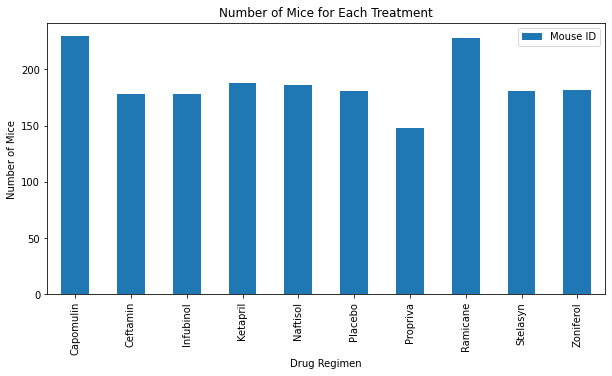

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
Drug_regimen_df=pd.DataFrame(clean_dataset.groupby(["Drug Regimen"])["Mouse ID"].count())
Drug_regimen_df.plot(kind="bar",figsize= (10,5))
plt.title("Number of Mice for Each Treatment")
plt.ylabel("Number of Mice")
plt.show()



In [10]:
Drug_regimen_df=Drug_regimen_df.reset_index()

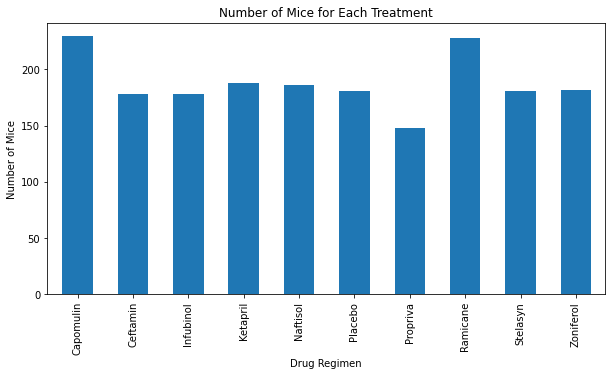

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(Drug_regimen_df))

yaxis=Drug_regimen_df["Drug Regimen"].tolist()
regimen_count=(clean_dataset.groupby(["Drug Regimen"])["Age_months"].count())
plt.figure(figsize=(10,5))
plt.bar(x_axis,regimen_count, width=.55)
plt.xticks(x_axis,yaxis, rotation="vertical" )
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-0.55,len(x_axis)-0.47)
plt.show()

## Pie Plots

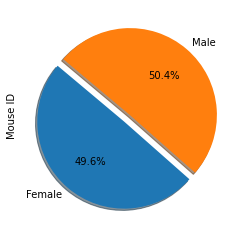

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist_df=clean_dataset.drop_duplicates(subset=["Mouse ID"])
explode = (0.1, 0)
gender_dist_df=gender_dist_df.groupby(["Sex"]).count()
gender=gender_dist_df["Mouse ID"]
pie_plot_pandas=gender.plot.pie(subplots=True,explode=explode,shadow=True,startangle=140,autopct='%1.1f%%',figsize=(4, 4))



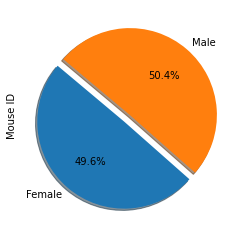

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels="Female","Male"
plt.pie(gender,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)
plt.ylabel("Mouse ID")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the and quantitatively determine if there are any potential outliers. 
capomulin_df = clean_dataset.loc[clean_dataset["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_dataset.loc[clean_dataset["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_dataset.loc[clean_dataset["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_dataset.loc[clean_dataset["Drug Regimen"] == "Ceftamin", :]


In [15]:
#For Capomulin
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_dataset, on=("Mouse ID","Timepoint"),how="left")
#capomulin_merge.head()

#Quartiles, IQR Capomulin
cap_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles =cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The values that are below {lower_bound} could be outliers.")
print(f"The values that are below {upper_bound} could be outliers.")



The values that are below 20.70456164999999 could be outliers.
The values that are below 51.83201549 could be outliers.


In [16]:
#For Ramicane
ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_dataset, on=("Mouse ID","Timepoint"),how="left")
#ramicane_merge.head()

#Quartiles, IQR Ramicane
ram_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The values that are below {lower_bound} could be outliers.")
print(f"The values that are below {upper_bound} could be outliers.")


The values that are below 17.912664470000003 could be outliers.
The values that are below 54.30681135 could be outliers.


In [17]:
#For Infubinol
infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_dataset, on=("Mouse ID","Timepoint"),how="left")
#infubinol_merge.head()

#Quartiles, IQR Infubinol
inf_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The values that are below {lower_bound} could be outliers.")
print(f"The values that are below {upper_bound} could be outliers.")


The values that are below 36.83290494999999 could be outliers.
The values that are below 82.74144559000001 could be outliers.


In [18]:
# Ceftamin
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_dataset, on=("Mouse ID","Timepoint"),how="left")
#ceftamin_merge.head()

#Quartiles, IQR Ceftamin
cef_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles =cef_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The values that are below {lower_bound} could be outliers.")
print(f"The values that are below {upper_bound} could be outliers.")


The values that are below 25.355449580000002 could be outliers.
The values that are below 87.66645829999999 could be outliers.


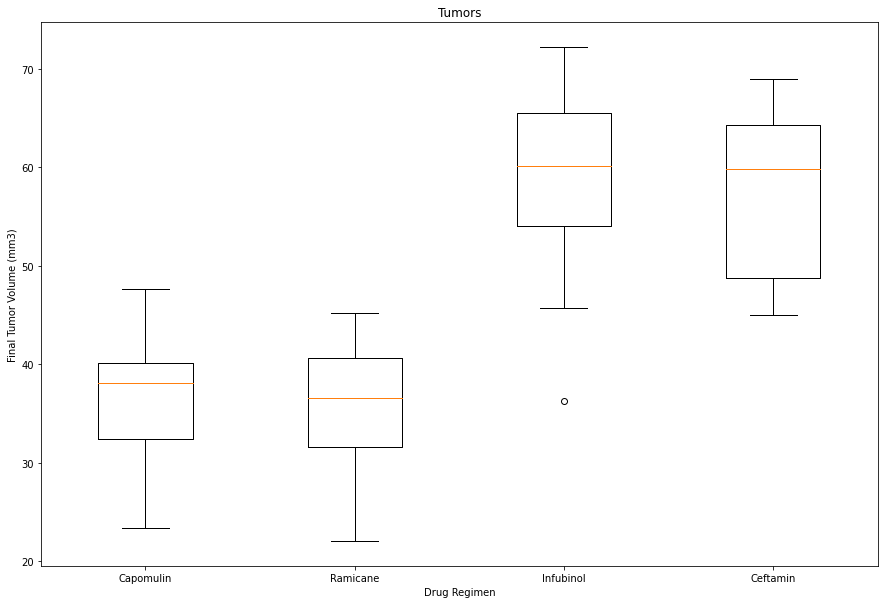

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]
labels= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title("Tumors")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(boxplot, labels=labels)
plt.show()


In [23]:
#Choosing the mouse
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [24]:
#Mouse b128 selected
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128",:]
line_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


## Line and Scatter Plots

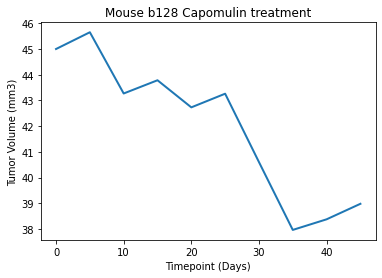

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

plt.title("Mouse b128 Capomulin treatment")
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

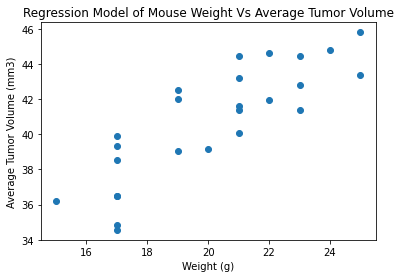

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Regression Model of Mouse Weight Vs Average Tumor Volume")
plt.show()


## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model
#between mouse weight and average tumor volume for the Capomulin treatment.
corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")





The correlation between mouse weight and average tumor volume is 0.84


In [34]:
model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712645e-07, stderr=0.1275435903320134)

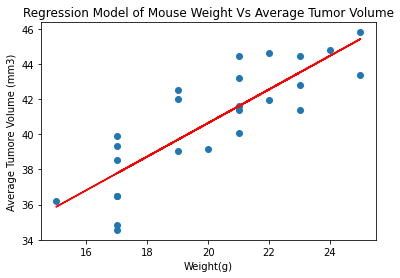

In [39]:
#Plot the linear regression model on top of the previous scatter plot.
y_values = cap_avg['Weight (g)']*.9544396890241045+21.552160532685015
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title("Regression Model of Mouse Weight Vs Average Tumor Volume")

plt.show()